# imports

In [134]:
from utility.utility_general import *
from utility import utility_crystal
import imp
from utility import util_plot
from utility import util_plot as Plots
import config, ml_tools
imp.reload(util_plot)
imp.reload(Plots)
imp.reload(config)
imp.reload(ml_tools)

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_colwidth', 500)

from datetime import datetime
from joblib import Parallel, delayed
from tqdm import tqdm, tqdm_notebook
from ase.formula import Formula
from IPython.display import display, Markdown

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, \
    roc_curve, auc

cnn_dir = config.cnn_model_dir
mlp_dir = config.cae_mlp_model_dir
mlp_clf_dir = config.cae_mlp_model_clf_dir

try:
    matplotlib.font_manager._rebuild()
except AttributeError:
    pass
save_plot = True

# Comments
* The final run should be from plots.py

# Literature

In [156]:
n_top_comp = 15

data = pd.read_csv(f'{local_data_path}/data_bases/cspd/summary.csv',
                   index_col=0)
natural_formula = [
    'TiO2', 'ZnO', 'CO2', 'SiO2', 'Al2O3', 'CSi', 'GaAs', 'GaN', 'ZrO2',
    'SnO2', 'MgO', 'CdS', 'CeO2', 'H2O', 'Fe3O4'
]

data = data.head(n_top_comp)
data['natural formula'] = natural_formula[:n_top_comp]
data['natural formula'] = [Formula(i).format('latex') for i in data['natural formula']]

df1 = data[['natural formula', 'anomaly selected']].rename(columns={'anomaly selected': 'n'})
df2 = data[['natural formula', 'cod counts']].rename(columns={'cod counts': 'n'})
df1['type'] = 'Anomaly'
df2['type'] = 'COD'
df = pd.concat([df1, df2])

Plot saved at: plots/paper/literature_b_c_.pdf


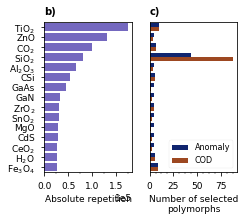

In [172]:
f, axs, fs = util_plot.plot_format((88, 70), ncols=2)

################# Plot b)
ax = axs[0]
sns.barplot(
    x="literature",
    y="natural formula",
    data=data,
    label="Study intensity",
    color='slateblue',
    # palette="GnBu_d",
    # palette="pastel",
    ax=ax,
)

ax.set_ylabel('')
ax.set_xlabel('Absolute repetition')
Plots.ax_tick_locator(ax, major_period=50000, minor_period=50000//2)
Plots.plot_tick_formatter(ax, axis='x', style='sci')
# ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# ax.xaxis.set_ticks([0, 1, 2, 3, 4, 5])

# ax.yaxis.grid(False)
# ax.yaxis.grid(True)
# ax.grid()
lines, labels = ax.get_legend_handles_labels()
# ax.legend(lines + lines2, labels + labels2, loc='lower right')

################# Plot c)
ax = axs[1]

# sns.barplot(data=data, x='anomaly selected', y='natural formula', color='darkred', ax=ax)
sns.barplot(data=df, x='n', y='natural formula', ax=ax, hue='type', palette=sns.color_palette("dark", 8))
ax.set_ylabel('')
ax.set_xlabel('Number of selected\npolymorphs', fontsize=fs)
Plots.ax_tick_locator(ax, major_period=25, minor_period=25/4)
# ax.xaxis.set_ticks([0, 20, 40])

# ax.yaxis.grid(True)
# ax.xaxis.grid(True)

# ax.grid('on')
# ax.grid()

lines2, labels2 = ax.get_legend_handles_labels()
ax.get_yaxis().set_visible(False)
ax.legend(loc='lower right')


###############
Plots.annotate_subplots_with_abc(axs, x=0, y=1.05, start_from=1)
if save_plot:
    Plots.plot_save('literature_b_c_', save_to_papers=True)
plt.show()
pass

# PCA analysis

## PCA

Plot saved at: plots/review/pca_analysis.pdf


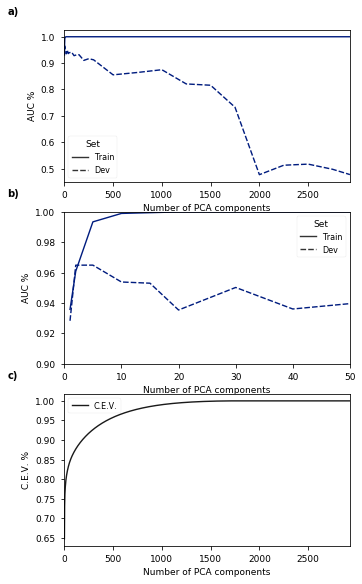

In [170]:
df = pd.read_csv('important_results_NOGIT/pca_analysis_cae_mlp_d9_encoder_9/pca_n_comp/df.csv')
pca_n_comp = 2928
mlp_dir = f'important_results_NOGIT/pca_analysis_cae_mlp_d9_encoder_9/pca_n_comp/mlp_clf_pca{pca_n_comp}'
mlp_clf = load_var(mlp_dir + f'/classifier_class.pkl')
clf = mlp_clf
pca = clf.pca
cev = np.cumsum(pca.explained_variance_ratio_)

df = df[~(df['set'] == 'test')]
df['Set'] = df['set'].str.capitalize()

f, axs, fs = Plots.plot_format(size=130, nrows=3)

ax = axs[0]
sns.lineplot(data=df, x='n_pca_comp', y='roc_auc', style='Set', ax=ax)
ax.set_ylabel('AUC %')
ax.set_xlabel('Number of PCA components')
ax.set_xlim(0, pca_n_comp)

ax = axs[1]
sns.lineplot(data=df, x='n_pca_comp', y='roc_auc', style='Set', ax=ax)
ax.set_ylabel('AUC %')
ax.set_xlabel('Number of PCA components')
ax.set_xlim(0, 50)
ax.set_ylim(0.9, 1)

ax2 = axs[2]
ax2 = sns.lineplot(x=np.arange(len(cev))+1, y=cev, color='k', label='C.E.V.')
ax2.set_xlabel('Number of PCA components')
# ax2.set_xticks(ax.get_xticks())
# ax2.tick_params(axis='x', rotation=0)

# ax2.xaxis.set_ticks([0,])
# ax2.get_legend().remove()

ax2.set_xlim(0, pca_n_comp)
ax2.set_ylabel('C.E.V. %')

Plots.annotate_subplots_with_abc(axs)

if save_plot:
    Plots.plot_save(f'pca_analysis', path='plots/review/', formats='pdf', transparent=True)

Plot saved at: plots/paper/pca.pdf


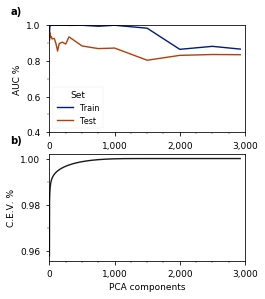

In [163]:
f, axs, fs = Plots.plot_format(size=89, nrows=2)
# #################### a) auc vs. n_pca_comp
ax = axs[0]
ax2 = axs[1]
sns.lineplot(data=df, x='n_pca_comp', y='roc_auc', palette='dark', ax=ax,
                  hue='Set', 
#                   style='clf'
                 )
ax.xaxis.label.set_visible(False)
# ax.xaxis.set_ticks([0, 1000, 2000, 3000])

ax.xaxis.set_major_locator(MultipleLocator(1000))
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_minor_locator(MultipleLocator(250))
# Plots.remove_ticks(ax=ax, axis='x', keep_ticks=True)

ax.yaxis.set_major_locator(MultipleLocator(.2))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
ax.yaxis.set_minor_locator(MultipleLocator(.1))
ax.set_ylim(0.4, 1)


# #################### b) c.e.v vs. n_pca_comp
sns.lineplot(x=range(len(cev)), y=cev, ax=ax2, color='k', label='C.E.V.')

ax2.set_xlabel('PCA components', fontsize=fs)
# ax2.set_xticks(ax.get_xticks())
ax2.tick_params(axis='x', rotation=0)

ax2.xaxis.set_ticks([0,])
ax2.get_legend().remove()

ax.set_ylabel('AUC %', fontsize=fs)
ax2.set_ylabel('C.E.V. %', fontsize=fs)


ax.set_xlim(0, 3000)
ax2.set_xlim(0, 3000)

ax2.xaxis.set_major_locator(MultipleLocator(1000))
ax2.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax2.xaxis.set_minor_locator(MultipleLocator(250))

ax2.yaxis.set_major_locator(MultipleLocator(.02))
ax2.yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
ax2.yaxis.set_minor_locator(MultipleLocator(.01))
# ax2.set_ylim(0.95, 1)

Plots.annotate_subplots_with_abc(axs)

if save_plot:
    Plots.plot_save('pca', save_to_papers=True)
plt.show()

## PCA zoom-in

Plot saved at: plots/paper/pca-zoomin.pdf


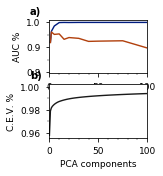

In [162]:
f, axs, fs = Plots.plot_format(size=89/2, nrows=2)


# #################### a) auc vs. n_pca_comp
ax = axs[0]
ax2 = axs[1]
sns.lineplot(data=df, x='n_pca_comp', y='roc_auc', palette='dark', ax=ax,
                  hue='Set', 
#                   style='clf'
                 )
ax.xaxis.label.set_visible(False)
ax.get_legend().remove()

ax.xaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_minor_locator(MultipleLocator(10))
# Plots.remove_ticks(ax=ax, axis='x', keep_ticks=True)

ax.yaxis.set_major_locator(MultipleLocator(.1))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
ax.yaxis.set_minor_locator(MultipleLocator(.05))

# #################### b) c.e.v vs. n_pca_comp
sns.lineplot(x=range(len(cev)), y=cev, ax=ax2, color='k', label='C.E.V.')

ax2.get_legend().remove()
ax2.set_xlabel('PCA components', fontsize=fs)
# ax2.set_xticks(ax.get_xticks())
ax2.tick_params(axis='x', rotation=0)

ax.set_ylabel('AUC %', fontsize=fs)
ax2.set_ylabel('C.E.V. %', fontsize=fs)

ax2.xaxis.set_major_locator(MultipleLocator(50))
ax2.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax2.xaxis.set_minor_locator(MultipleLocator(10))

ax2.yaxis.set_major_locator(MultipleLocator(.02))
ax2.yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
ax2.yaxis.set_minor_locator(MultipleLocator(.01))

ax.set_xlim(0, 100)
ax2.set_xlim(0, 100)

Plots.annotate_subplots_with_abc(axs)

if save_plot:
    Plots.plot_save('pca-zoomin', save_to_papers=True)
plt.show()

# ROC 

              precision    recall  f1-score   support

          -1       0.74      0.96      0.84       184
           1       0.99      0.93      0.96       896

    accuracy                           0.94      1080
   macro avg       0.87      0.95      0.90      1080
weighted avg       0.95      0.94      0.94      1080

Best threshold = 0.50000
CNN-C accuracy: 93.7%
              precision    recall  f1-score   support

          -1       0.74      0.80      0.77       184
           1       0.96      0.94      0.95       896

    accuracy                           0.92      1080
   macro avg       0.85      0.87      0.86      1080
weighted avg       0.92      0.92      0.92      1080

Best threshold = 0.50000
CAE-MLP-C accuracy: 91.9%
Saving plots
Plot saved at: plots/paper/roc.pdf


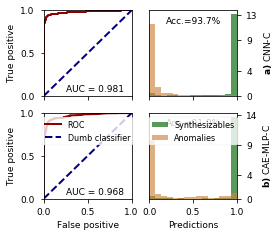

In [89]:
# ###################### Preparation

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, \
    roc_curve, auc

cnn_dir = config.cnn_model_dir
mlp_dir = config.cae_mlp_model_dir

yp_test_cnn = pd.read_csv(cnn_dir + '/yp_test.csv').rename(columns={
    'y': 'y_true', 'yp': 'yp_proba', 'ypl': 'yp_label'})
mlp_clf = load_var(mlp_dir + f'/mlp_clf_epoch0004/classifier_class.pkl')
yp_test_mlp = pd.DataFrame(mlp_clf.predictions['test'])

# Checking if the test set of the classifiers are the same set
assert (yp_test_cnn['y_true'] == yp_test_mlp['y_true']).all() 
y = yp_test_cnn['y_true']

predictions = {'CNN-C': yp_test_cnn, 'CAE-MLP-C': yp_test_mlp}
clf_nick_names = {
    'CNN-C': 'CNN-C',
    'CAE-MLP-C': 'CAE-MLP-C',
}

f, axs, font_size = Plots.plot_format(ncols=2, nrows=2, equal_axis=True)
stat = {'Classifier': [], 'AUC': [], 'Accuracy': [], 'Sensitivity': [], 'Specificity': []}

for plt_n, clf_name in enumerate(predictions):
    sub_plt_pos = np.unravel_index(plt_n * 2, axs.shape)
    ax = axs[sub_plt_pos]
    prob = predictions[clf_name]['yp_proba']
    prob_pos = prob[y > 0]
    prob_neg = prob[y < 0]
    fpr, tpr, threshold = roc_curve(y, prob)
    roc_auc = auc(fpr, tpr)

    best_threshold = 0.5

    from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve
    y_pred = predictions[clf_name]['yp_label']
    acc = accuracy_score(y, y_pred)

    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    stat['Classifier'].append(clf_nick_names[clf_name])
    stat['AUC'].append(roc_auc)
    stat['Accuracy'].append(acc)
    stat['Sensitivity'].append(sensitivity)
    stat['Specificity'].append(specificity)

    print(classification_report(y, y_pred))
    print(f'Best threshold = {best_threshold:.5f}')

    
    # ###################### Plot ROC
    
    lw = 2
    #     sns.set_color_codes('colorblind')
    sns.set_color_codes('dark')
    ax.plot(fpr, tpr,
            color='darkred',
            lw=lw,
            # label='ROC (AUC = %0.2f)' % roc_auc,
            label='ROC',
            )

    ax.text(x=.25, y=0.05, s=f'AUC = {roc_auc:0.3f}', fontsize=font_size)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
            label='Dumb classifier', )

#     ax.scatter(x=fp / (fp + tn), y=tp / (tp + fn), marker='o', color='k', label='Decision point', s=30)

#     # box
#     # ax[sub_plt_pos].plot([0, 1], [0, 0], color='k', lw=0.75, linestyle='-')
#     # ax[sub_plt_pos].plot([0, 1], [1, 1], color='k', lw=0.75, linestyle='-')
#     # ax[sub_plt_pos].plot([1, 1], [0, 1], color='k', lw=0.75, linestyle='-')
#     # ax[sub_plt_pos].plot([0, 0], [0, 1], color='k', lw=0.75, linestyle='-')

    if sub_plt_pos[0] + 1 == len(clf_nick_names):
        ax.set_xlabel('False positive', fontsize=font_size)
        ax.legend(loc='upper center')
    else:
        Plots.remove_ticks(ax, keep_ticks=True)
    ax.set_ylabel('True positive', fontsize=font_size)
    n = 0.0
    ax.set_ylim(0 - n, 1 + n)
    ax.set_xlim(0 - n, 1 + n)
    Plots.change_number_of_ticks(ax, 3, dtype=float)
#     ax.grid()

    sub_plt_pos = np.unravel_index(plt_n * 2 + 1, axs.shape)
    
    
    
    # ###################### Plot Distribution
    ax = axs[sub_plt_pos]
    bins = 15
    pos_plot = sns.distplot(prob_pos, bins=bins,
                            label=f'Synthesizables', hist_kws=dict(edgecolor="k", linewidth=0, alpha=.65),
                            ax=ax, kde=False, norm_hist=True, 
                            color='darkgreen'
                           )
    neg_plot = sns.distplot(prob_neg, bins=bins,
                            label=f'Anomalies', hist_kws=dict(edgecolor="k", linewidth=0, alpha=.65),
                            ax=ax, kde=False, norm_hist=True, 
                            color='peru'
                           )

#     ax.plot([best_threshold, best_threshold], [0, ax.get_ylim()[1] / 2], color='orchid',
#             lw=lw, linestyle='--', label='Best')


    # box
    # ymax = max(neg_plot.dataLim.max[1], pos_plot.dataLim.max[1])
    # ax.plot([0, 1], [0, 0], color='k', lw=0.75, linestyle='-')
    # ax.plot([0, 1], [1.05 * ymax, 1.05 * ymax], color='k', lw=0.75, linestyle='-')
    # ax.plot([1, 1], [0, 1.05 * ymax], color='k', lw=0.75, linestyle='-')
    # ax.plot([0, 0], [0, 1.05 * ymax], color='k', lw=0.75, linestyle='-')
    if sub_plt_pos[0] + 1 == len(clf_nick_names):
        ax.set_xlabel('Predictions', fontsize=font_size)
        ax.legend(loc='upper center')
    else:
        Plots.remove_ticks(ax, keep_ticks=True)
        ax.set_xlabel('', fontsize=font_size)
    ax.text(x=.5, y=0.85, s=f'Acc.={acc * 100:0.1f}%', fontsize=font_size, transform=ax.transAxes,
            ha='center')

    print(f'{clf_nick_names[clf_name]} accuracy: {acc * 100:0.1f}%')

    ax.yaxis.set_ticks_position('right')
    import string
    abc = string.ascii_lowercase[sub_plt_pos[0]]
    # abc = r'\textbf{}'.format(abc)
    ax.set_ylabel(f'$\\bf{abc})$ {clf_nick_names[clf_name]}', fontsize=font_size, )
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

    Plots.change_number_of_ticks(ax, 4)

    # from matplotlib.ticker import MaxNLocator
    # ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    # Plots.ylabel_right_side(ax, f'{clf_nick_names[clf_name]}')
    n = -0.0
    # ax.set_ylim(0 - n, 1 + n)
    ax.set_xlim(0 - n, 1 + n)
#     ax.grid()
    # ax.margins()

stat = pd.DataFrame(stat)
stat.to_csv('plots/paper/roc-stats.csv')

# if save_plot:
#     print('Saving plots')
#     Plots.plot_save('roc', save_to_papers=True)
plt.show()


# Electrode and Thermoelectric Materials

## Electrode materials
Dividing samples into:
* ICSD: Materials matching with an ICSD sample. No matter they're from COD or MP
* Non-ICSD: Only coming from the MP and has no ICSD matches

In [108]:
electrode_df = pd.read_csv(data_path + '/electrode_materials/electrode-materials.csv')

# cnn_dir = 'results/train_cnn_3/design_1/data_set_07/cnn-3-13-7-over-normalizer2'
# mlp_dir = 'results/train_cae_mlp_02/design_1/data_set_07/cae-mlp-3-13-7-over-normalizer2'

cnn_dir = config.cnn_model_dir
mlp_dir = config.cae_mlp_model_dir
mlp_clf_dir = config.cae_mlp_model_clf_dir

yp_cs_cnn = pd.read_csv(cnn_dir + '/yp_cs.csv').rename(columns={
    'y': 'y_true', 'yp': 'yp_proba', 'ypl': 'yp_label'})
yp_cs_mlp = pd.read_csv(mlp_dir + '/cs_predictions.csv').rename(columns={
    'yp_mlp': 'yp_proba', 'y': 'y_true', 'ypl_mlp': 'yp_label'})

assert (yp_cs_cnn['file'] == yp_cs_mlp['file']).all()
assert (yp_cs_mlp.loc[yp_cs_mlp['type'] == 'electrode']['file'] == electrode_df['path']).all()

electrode_df['icsd-tag'] = electrode_df['db']
electrode_df.loc[electrode_df['icsd_ids'].notna(), 'icsd-tag'] = 'ICSD'
electrode_df.loc[(~electrode_df['icsd_ids'].notna()) & (electrode_df['db']=='mp'), 'icsd-tag'] = 'Non-ICSD'

print('Database stats: ')
print(electrode_df['db'].value_counts())
print('Electrode stats: ')
print(electrode_df['icsd-tag'].value_counts())
print('\nNon-ICSD stats:')
print(electrode_df.loc[electrode_df['icsd-tag'] == 'Non-ICSD', 'db'].value_counts())
print('\nICSD stats:')
print(electrode_df.loc[electrode_df['icsd-tag'] == 'ICSD', 'db'].value_counts())

yp_cs_cnn['icsd-tag'] = None
yp_cs_cnn.loc[yp_cs_cnn['type'] == 'electrode', 'icsd-tag'] = electrode_df['icsd-tag']
yp_cs_mlp['icsd-tag'] = None
yp_cs_mlp.loc[yp_cs_mlp['type'] == 'electrode', 'icsd-tag'] = electrode_df['icsd-tag']

Database stats: 
mp                 1824
mp-avail-in-cod     267
cod                 258
cod-sc                6
Name: db, dtype: int64
Electrode stats: 
Non-ICSD           1726
cod                 258
ICSD                212
mp-avail-in-cod     153
cod-sc                6
Name: icsd-tag, dtype: int64

Non-ICSD stats:
mp    1726
Name: db, dtype: int64

ICSD stats:
mp-avail-in-cod    114
mp                  98
Name: db, dtype: int64


Plot saved at: plots/paper/electrode_preds_dist_cnn.pdf


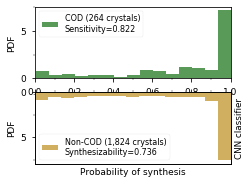

Plot saved at: plots/paper/electrode_preds_dist_cae-mlp.pdf


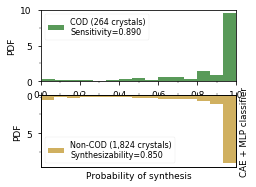

In [123]:
size = 89
nrows = 2
ncols = 1
size = (size, size * (5**.5 - 1) / 2 * (nrows / ncols) * (2/3))
bins = 15

clf_1 = {'df': yp_cs_cnn, 'title': 'CNN classifier', 'label': 'cnn', 'type': 'electrode'}
clf_2 = {'df': yp_cs_mlp, 'title': 'CAE + MLP classifier', 'label': 'cae-mlp', 'type': 'electrode'}


for clf in [clf_1, clf_2]:
    df = clf['df']
    title = clf['df']
    df = df[df['type'] == clf['type']]
    
    f, axs, fs = Plots.plot_format(size=size, nrows=nrows)
    ax = axs[0]
#     samples = df.loc[df['icsd-tag']=='ICSD']
    samples = df.loc[df['db']=='cod']
    sensitivity = accuracy_score(samples['y_true'], samples['yp_label'])
    sns.distplot(
        samples['yp_proba'],
        bins=bins,
#         label=f'ICSD ({len(samples):,} crystals)\nSensitivity={sensitivity:.3f}',
        label=f'COD ({len(samples):,} crystals)\nSensitivity={sensitivity:.3f}',
        hist_kws=dict(edgecolor="k", linewidth=0, alpha=.65),
        ax=ax,
        kde=False,
        norm_hist=True,
        color='darkgreen'
                )

    ###############

    ax2 = axs[1]
    ax2.xaxis.tick_top()
    Plots.remove_ticks(ax2, keep_ticks=True)
    ax2.invert_yaxis()
#     samples = df.loc[df['icsd-tag']=='Non-ICSD']
    samples = df.loc[df['db']=='mp']
    synthesizability = accuracy_score(samples['y_true'], samples['yp_label'])
    sns.distplot(
        samples['yp_proba'],
        bins=bins,
#         label=f'Non-ICSD ({len(samples):,} crystals)\nSynthesizability={synthesizability:.3f}',
        label=f'Non-COD ({len(samples):,} crystals)\nSynthesizability={synthesizability:.3f}',
        hist_kws=dict(edgecolor="k", linewidth=0, alpha=.65),
        ax=ax2,
        kde=False,
        norm_hist=True,
        color='darkgoldenrod'
                )
    ax2.set_xlabel('Probability of synthesis')
    Plots.ylabel_right_side(ax2, clf['title'])

    for axi in [ax, ax2]:
        axi.set_ylabel('PDF')
        axi.set_xlim(0, 1)
        axi.yaxis.set_major_locator(MultipleLocator(5))
        axi.yaxis.set_minor_locator(MultipleLocator(2.5))
        axi.xaxis.set_major_locator(MultipleLocator(.2))
        axi.xaxis.set_minor_locator(MultipleLocator(.1))
        axi.legend()

#     if save_plot:
#         Plots.plot_save(f'electrode_preds_dist_{clf["label"]}', save_to_papers=True)
    plt.show()

## Thermoelectric materials

Plot saved at: plots/paper/thermoelectric_preds_dist_cnn.pdf


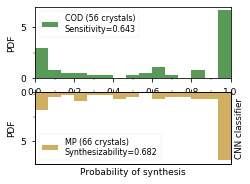

Plot saved at: plots/paper/thermoelectric_preds_dist_cae-mlp.pdf


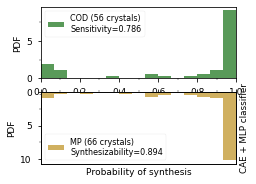

In [124]:
size = 89
nrows = 2
ncols = 1
size = (size, size * (5**.5 - 1) / 2 * (nrows / ncols) * (2/3))
bins = 15

clf_1 = {'df': yp_cs_cnn, 'title': 'CNN classifier', 'label': 'cnn', 'type': 'thermoelectric'}
clf_2 = {'df': yp_cs_mlp, 'title': 'CAE + MLP classifier', 'label': 'cae-mlp', 'type': 'thermoelectric'}

# To make sure we remove the MP samples that exist in the COD
thermo_df = pd.read_csv(f'{data_path}/thermoelectric_materials/thermoelectric_materials.csv')
thermo_df['filename'] = thermo_df['filename'].str.replace('/ali/', '/adavar2/')
# assert (df.reset_index()['file'] == thermo_df.reset_index()['filename']).all()


for clf in [clf_1, clf_2]:
    df = clf['df']
    title = clf['df']
    df = df[df['type'] == clf['type']]
    
    df = df.reset_index(drop=True)
    df['db'] = thermo_df['db'].to_list()
    
    f, axs, fs = Plots.plot_format(size=size, nrows=nrows)
    ax = axs[0]
    samples = df.loc[df['db']=='cod']
    sensitivity = accuracy_score(samples['y_true'], samples['yp_label'])
    sns.distplot(
        samples['yp_proba'],
        bins=bins,
        label=f'COD ({len(samples):,} crystals)\nSensitivity={sensitivity:.3f}',
        hist_kws=dict(edgecolor="k", linewidth=0, alpha=.65),
        ax=ax,
        kde=False,
        norm_hist=True,
        color='darkgreen'
                )

    ###############

    ax2 = axs[1]
    ax2.xaxis.tick_top()
    Plots.remove_ticks(ax2, keep_ticks=True)
    ax2.invert_yaxis()
    samples = df.loc[df['db']=='mp']
    synthesizability = accuracy_score(samples['y_true'], samples['yp_label'])
    sns.distplot(
        samples['yp_proba'],
        bins=bins,
        label=f'MP ({len(samples):,} crystals)\nSynthesizability={synthesizability:.3f}',
        hist_kws=dict(edgecolor="k", linewidth=0, alpha=.65),
        ax=ax2,
        kde=False,
        norm_hist=True,
        color='darkgoldenrod'
                )
    ax2.set_xlabel('Probability of synthesis')
    Plots.ylabel_right_side(ax2, clf['title'])

    for axi in [ax, ax2]:
        axi.set_ylabel('PDF')
        axi.set_xlim(0, 1)
        axi.yaxis.set_major_locator(MultipleLocator(5))
        axi.yaxis.set_minor_locator(MultipleLocator(2.5))
        axi.xaxis.set_major_locator(MultipleLocator(.2))
        axi.xaxis.set_minor_locator(MultipleLocator(.1))
        axi.legend()

#     if save_plot:
#         Plots.plot_save(f'{clf["type"]}_preds_dist_{clf["label"]}', save_to_papers=True)
    plt.show()

# Electrodes Voltage and Capacity plot

In [128]:
electrode_df = pd.read_csv(data_path + '/electrode_materials/electrode-materials.csv')

yp_cs_cnn = pd.read_csv(cnn_dir + '/yp_cs.csv').rename(columns={
    'y': 'y_true', 'yp': 'yp_proba', 'ypl': 'yp_label'})

assert (yp_cs_cnn.loc[yp_cs_cnn['type'] == 'electrode']['file'] == electrode_df['path']).all()

bat_dic = {
    'capacity_vol': 'Tot. Vol. Cap. ($AhI^{-1}$)',
    'average_voltage': 'Avg. Voltage ($V$)',
}
electrode_df = pd.concat([electrode_df, yp_cs_cnn.loc[yp_cs_cnn['type'] == 'electrode']], axis=1)
electrode_df = electrode_df[(~electrode_df['average_voltage'].isna()) & (~electrode_df['capacity_vol'].isna())]
print(electrode_df['working_ion'].value_counts())

Li    1090
Na     215
Ca     202
Mg     155
Zn     142
K       92
Y       68
Al      63
Rb      35
Cs      29
Name: working_ion, dtype: int64


In [129]:
electrode_df['label'] = [Formula(i).reduce()[0].__str__() for i in electrode_df['formula_discharge']]
electrode_df['label'] = electrode_df['label'] + ', ' + pd.Series([f'({str(i)})' for i in electrode_df['sgn']] )
# electrode_df

Plot saved at: plots/paper/battery_prop_vs_probability.pdf


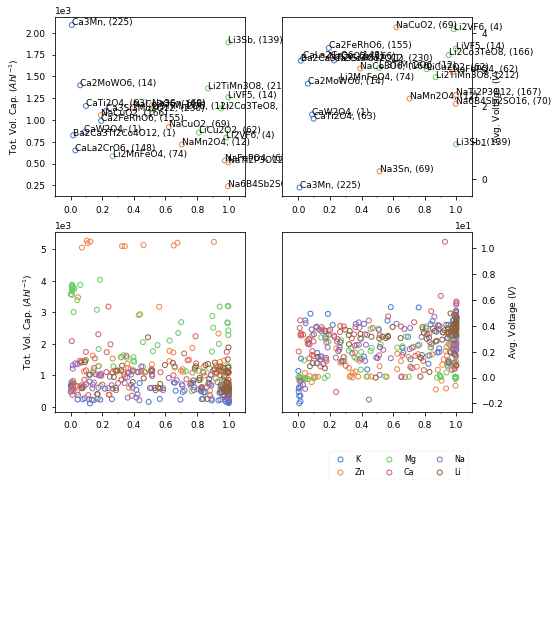

In [131]:
f, axs, fs = Plots.plot_format(190, equal_axis=True, ncols=2, nrows=3)

gs = axs[-1, 0].get_gridspec()
for ax in axs[-1, :]:
    ax.remove()
axbig = f.add_subplot(gs[-1:, :])

plot_1 = {'prop': 'capacity_vol', 'prop_2': 'average_voltage', 'frac_sample': None, 'n_sample': 8,
          'top_wi': 3, 'text':True, 'text_label': 'label', 'ax': axs[0,0], 'ax2': axs[0,1]}
plot_2 = {'prop': 'capacity_vol', 'prop_2': 'average_voltage', 'frac_sample': None, 'n_sample': 70,
          'top_wi': 6, 'text':False,'text_label': None, 'ax': axs[1,0], 'ax2': axs[1,1]}

for pl in [plot_1, plot_2]:
    pal = sns.color_palette("muted", np.unique(electrode_df['working_ion']).size)
    pal2 = sns.color_palette("muted", np.unique(electrode_df['working_ion']).size)
    # wi_order = np.unique(electrode_df['working_ion'])
    wi, co = np.unique(electrode_df['working_ion'], return_counts=True)
    wi_order = wi[np.argsort(co)[-pl['top_wi']:]]

    ax = pl['ax']
    ax2 = pl['ax2']
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()
    for wi in wi_order:
        df = electrode_df[electrode_df['working_ion'] == wi]
        
        if pl['n_sample'] is not None:
            df = df.sample(n=pl['n_sample'], random_state=0, 
                           weights=(df[pl['prop']]**2) * (df['yp_proba'] ** 0.05))
        if pl['frac_sample'] is not None:
            df = df.sample(frac=pl['frac_sample'], random_state=0, 
                           weights=(df[pl['prop']]**2) * (df['yp_proba'] ** 0.05))
            
        ax.scatter(df['yp_proba'],
                   df[pl['prop']], s=25, facecolors='none', edgecolors=pal.pop(0),
                   linewidth=1., label=wi)
        if pl['text']:
            for _, row in df.iterrows():
                ax.text(row['yp_proba'], row[pl['prop']], row[pl['text_label']])
        ax.set_ylabel(bat_dic[pl['prop']])
        ####
        ax2.scatter(df['yp_proba'],
                   df[pl['prop_2']], s=25, facecolors='none', edgecolors=pal2.pop(0),
                   linewidth=1., label=wi)
        if pl['text']:
            for _, row in df.iterrows():
                ax2.text(row['yp_proba'], row[pl['prop_2']], row[pl['text_label']])
        ax2.set_ylabel(bat_dic[pl['prop_2']])
    
    for axi in [ax, ax2]:
        axi.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
        axi.set_xlim(-0.1, 1.1)
        axi.xaxis.set_major_locator(MultipleLocator(.2))
        axi.xaxis.set_minor_locator(MultipleLocator(.1))
        

h, l = axs[1, 0].get_legend_handles_labels()
axbig.legend(h, l, loc='best', ncol=3)
axbig.axis('off')

# if save_plot:
#     Plots.plot_save(f'battery_prop_vs_probability', save_to_papers=True)

# Skyline

In [72]:
sky_line_path = data_path + '/skyline'
df_all = pd.read_csv(sky_line_path + '/df.csv', index_col=0)
skyline_vars = load_var(sky_line_path + '/variables.pkl')

compositions = skyline_vars['composition']
min_eng = skyline_vars['min_eng']
eng = skyline_vars['eng']
eng_flat = [item for sublist in eng for item in sublist]
min_eng_above_ground_dict = skyline_vars['min_eng_above_ground']
min_eng_above_ground = list(min_eng_above_ground_dict.values())
min_convex_hull = skyline_vars['min_convex_hull']
eng_min_convex_hull = skyline_vars['eng_min_convex_hull']

compositions_latex = [Formula(i).format('latex') for i in compositions]

df_all['x'] = None
for i, c in enumerate(compositions):
    df_all.loc[df_all['pretty_formula'] == c ,'x'] = i
df_all['compositions_latex'] = [Formula(i).format('latex') for i in df_all['pretty_formula']]

df_pos = df_all[df_all['ypl']>0]
df_neg = df_all[df_all['ypl']<0]


In [73]:
# https://stackoverflow.com/questions/34888058/changing-width-of-bars-in-bar-chart-created-using-seaborn-factorplot
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

Plot saved at: plots/paper/skyline_a.pdf


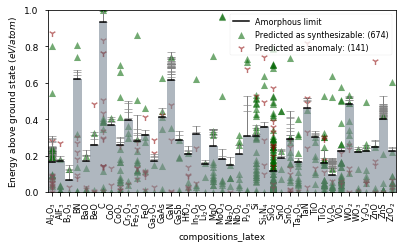

In [82]:
f, ax, font_size = Plots.plot_format(180 * .805)

# ########################## Background
sns.barplot(compositions_latex, min_eng_above_ground,
            # color='lightseagreen', alpha=0.3, edgecolor='black', linewidth=2,
            color='lightslategray', alpha=0.6,
#             edgecolor='black', linewidth=1,
            errwidth=1, capsize=1,
            orient='v',
            # label='Below amorphous limits'
            )

# Energy error bars
eng_grouped = eng
for i in range(len(eng_grouped)):
    ax.plot([i, i], [min(eng_grouped[i]), max(eng_grouped[i])], color='gray', linewidth=1)
#     sns.lineplot([i, i], [min(eng_grouped[i]), max(eng_grouped[i])], color='gray', linewidth=1, ax=ax)
    sns.scatterplot([i] * len(eng_grouped[i]), eng_grouped[i],
                    color='gray',ax=ax,
                    label=None, marker='_', s=60)
change_width(ax, 1.01)

alpha = 0.55
size = 50
# Predictions on group 1 & 2
sns.regplot(df_pos['compositions_latex'], df_pos['e_above_hull'], marker='^', fit_reg=False,
            scatter_kws={"color": Plots.colors_databases['cod'],
                         "alpha": alpha, "s": size},
            label=f'Predicted as synthesizable: ({len(df_pos)})',ax=ax,
            )

sns.regplot(df_neg['compositions_latex'], df_neg['e_above_hull'], marker='1', fit_reg=False,
            scatter_kws={"color": 'darkred',
                         "alpha": alpha, "s": size},
            label=f"Predicted as anomaly: ({len(df_neg)})",ax=ax,
            )


# ############################## Amorphous limit lines
label = 'Amorphous limit'
for i in range(len(compositions)):
    sns.lineplot([i - 0.35, i + 0.35], [min_eng_above_ground[i]] * 2, label=label, color='k', linewidth=1.5)
    label = None

    
ax.set_ylabel('Energy above ground state ($eV/atom$)', fontsize=font_size)

ax.set_xlim(0 - 0.5 , len(compositions)-0.5)
ax.set_ylim(0, 1)
# ax.set_xticklabels(compositions_latex)
plt.xticks(range(len(compositions_latex)), compositions_latex)
plt.xticks(rotation=90, fontsize=font_size - 1)
plt.legend(loc='upper right')
plt.tight_layout()

# if save_plot:
#     Plots.plot_save(f'skyline_a', save_to_papers=True)


Plot saved at: plots/paper/skyline_b.pdf


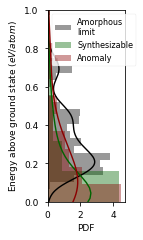

In [93]:
size = (180 * .2, 88.9969)
if f is not None:
    size = f.get_size_inches() * 25.4
    size[0] = 180 - size[0]
f, ax, font_size = Plots.plot_format(size)

verical = True
sns.distplot(eng_flat, bins=25, vertical=verical, color='k', label='Amorphous\nlimit')
# sns.distplot(min_eng_above_ground, bins=25, vertical=verical, color='k', label='Amorphous\nlimit')
sns.distplot(df_pos['e_above_hull'], bins=30, vertical=verical, color='darkgreen', label='Synthesizable')
sns.distplot(df_neg['e_above_hull'], bins=30, vertical=verical, color='darkred', label='Anomaly')

ax.set_ylabel('Energy above ground state ($eV/atom$)', fontsize=font_size)
plt.ylim(top=1, bottom=0)
# plt.grid('on')
plt.xlabel('PDF')
plt.legend()

# if save_plot:
#     Plots.plot_save(f'skyline_b', save_to_papers=True)
plt.show()

# Table: thermoelectric materials 2002, 2018

In [134]:
yp_cs_cnn = pd.read_csv(cnn_dir + '/yp_cs.csv').rename(columns={
    'y': 'y_true', 'yp': 'yp_proba', 'ypl': 'yp_label'})
yp_cs_mlp = pd.read_csv(mlp_dir + '/cs_predictions.csv').rename(columns={
    'yp_mlp': 'yp_proba', 'y': 'y_true', 'ypl_mlp': 'yp_label'})
yp_cs_cnn['CNN'] = yp_cs_cnn['yp_proba']
yp_cs_mlp['CAE-MLP'] = yp_cs_mlp['yp_proba']
yp_cs = pd.concat([yp_cs_cnn[['file', 'CNN']], yp_cs_mlp[['CAE-MLP']]], axis=1)

df = yp_cs_mlp[yp_cs_mlp['type'] == 'thermoelectric']

# To make sure we remove the MP samples that exist in the COD
thermo_df = pd.read_csv(f'{data_path}/thermoelectric_materials/thermoelectric_materials.csv')
thermo_df['filename'] = thermo_df['filename'].str.replace('/ali/', '/adavar2/')
thermo_df['file'] = thermo_df['filename']
assert (df.reset_index()['file'] == thermo_df.reset_index()['filename']).all()
assert (yp_cs_cnn['file'] == yp_cs_mlp['file']).all()

In [135]:
df = thermo_df[(thermo_df['year'] == 2002) | (thermo_df['year'] == 2018)]
df = df[(df['db'] == 'mp') | (df['db'] == 'cod')]
df = pd.merge(df.drop(columns=['filename']), yp_cs, on='file', how='left')
sg = utility_crystal.SpaceGroups()
df['HM'] = [sg.convert(int(i), 'sgn', 'HM', pick_one=True) for i in df['sgn']]

df['sgn'] = df['sgn'].astype('int')
df['CNN'] = df['CNN'].round(2)
df['CAE-MLP'] = df['CAE-MLP'].round(2)
# df['Composition'] = [Formula(i).format('latex') for i in df['formula']]

print(df[['formula', 'year', 'HM', 'CNN', 'CAE-MLP']].to_latex(index=False))
# df

\begin{tabular}{lrlrr}
\toprule
  formula &  year &         HM &   CNN &  CAE-MLP \\
\midrule
   Mo3Te4 &  2002 &       R -3 &  0.38 &     1.00 \\
     B2Zr &  2002 &  P 6/m m m &  0.38 &     0.06 \\
    Si2Zr &  2002 &    C m c m &  0.27 &     0.95 \\
   Mo5Si3 &  2002 &  I 4/m c m &  0.13 &     0.07 \\
     SbTm &  2002 &   P m -3 m &  0.86 &     1.00 \\
     SbTm &  2002 &   F m -3 m &  0.81 &     1.00 \\
   P2SnZn &  2018 &   I -4 2 d &  1.00 &     1.00 \\
   P2SnZn &  2018 &   P -4 m 2 &  0.94 &     1.00 \\
     CuTe &  2018 &    P m m n &  0.83 &     1.00 \\
 Cu2Se2Tl &  2018 &  I 4/m m m &  0.99 &     1.00 \\
\bottomrule
\end{tabular}



In [618]:
df['Composition'] = [f'\\ch{{{i}}}' for i in df['formula']]
print(df['Composition'])

0       \ch{Mo3Te4}
1         \ch{B2Zr}
2         \ch{B2Zr}
3        \ch{Si2Zr}
4        \ch{Si2Zr}
5       \ch{Mo5Si3}
6       \ch{Mo5Si3}
7         \ch{SbTm}
8         \ch{SbTm}
9         \ch{SbTm}
10      \ch{P2SnZn}
11      \ch{P2SnZn}
12        \ch{CuTe}
13        \ch{CuTe}
14    \ch{Cu2Se2Tl}
Name: Composition, dtype: object


# Most repeated compositions

In [651]:
df = pd.read_csv(local_data_path + '/data_bases/cspd/literature.csv')
df['composition'] = [i.strip() for i in df['formulas']]
df['rank'] = np.array(range(len(df)), dtype=int) + 1
df['n_repetition'] = df['literature counts']

Plot saved at: plots/sup/n_repetitions_vs_rank.pdf


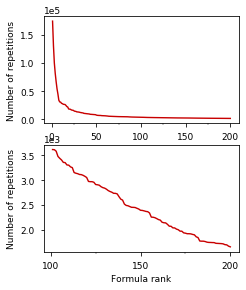

In [652]:
f, axs, font_size = Plots.plot_format(89, nrows=2)

ax = axs[0]
ax2 = axs[1]

sns.lineplot(data=df.head(200), x='rank', y='n_repetition', ax=ax)
sns.lineplot(data=df[100:200], x='rank', y='n_repetition', ax=ax2)

for axi in axs:
    axi.set_xlabel('Formula rank')
    axi.set_ylabel('Number of repetitions')
    
    axi.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    axi.xaxis.set_major_locator(MultipleLocator(50))
    axi.xaxis.set_minor_locator(MultipleLocator(25))
# ax2.set(yscale="log")
# ax2.set_xlim(100, 200)
# ax2.set_ylim(0, 500)
if save_plot:
    Plots.plot_save(f'n_repetitions_vs_rank', path='plots/sup/', formats='pdf')

# Epoch vs. Loss

In [102]:
# cnn_dir = 'finalized_results/cnn-3-13-7-over'
# mlp_dir = 'finalized_results/cae-mlp-3-13-7-over'

cnn_hist = pd.read_csv(cnn_dir + '/history.csv')
mlp_hist = pd.read_csv(mlp_dir + '/batches.csv')
epochs = mlp_hist['epoch'].unique()
epochs_x = (epochs + 1) * np.count_nonzero(mlp_hist['epoch'] == 0)

Plot saved at: plots/sup/loss_epoch.pdf


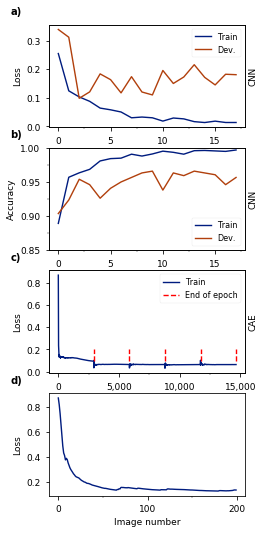

In [108]:
f, axs, font_size = Plots.plot_format(89, nrows=4)

sns.set_palette("dark")

ax_iter = iter(axs)

ax = axs[0]
ax2 = axs[1]
ax3 = axs[2]


# ###################### A)
ax = next(ax_iter)
hist = cnn_hist
sns.lineplot(range(len(hist["loss"])), hist["loss"], ax=ax)
sns.lineplot(range(len(hist["loss"])), hist["val_loss"], ax=ax)
ax.legend(["Train", "Dev."])
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
Plots.ax_tick_locator(ax, axis='x', major_period=5, minor_period=2.5)
Plots.ylabel_right_side(ax, 'CNN')

# ###################### B)
ax = next(ax_iter)
sns.lineplot(range(len(hist["accuracy"])), hist["accuracy"], ax=ax)
sns.lineplot(range(len(hist["accuracy"])), hist["val_accuracy"], ax=ax)
ax.legend(["Train", "Dev."])
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
Plots.ax_tick_locator(ax, axis='x', major_period=5, minor_period=2.5)
Plots.ax_tick_locator(ax, axis='y', major_period=.05, minor_period=.025)
ax.set_ylim(.85, 1)
Plots.ylabel_right_side(ax, 'CNN')

# ###################### C)
ax = next(ax_iter)
sns.lineplot(range(len(mlp_hist)), mlp_hist['loss'], ax=ax)
for x in epochs_x:
    ax.plot([x, x], [0.1, .2], '--r')
#     sns.lineplot(data=pd.DataFrame({'x': [x, x], 'y':[0.1, 0.2]}), x='x', y='y')
ax.legend(["Train", 'End of epoch'])
ax.set_xlabel('Image number')
ax.set_ylabel('Loss')
Plots.ax_tick_locator(ax, axis='x', major_period=5000, minor_period=2500)
Plots.ylabel_right_side(ax, 'CAE')
Plots.plot_tick_formatter(ax, axis='x', style='comma')

# ###################### D)
ax = next(ax_iter)
sns.lineplot(pd.Series(range(200)), mlp_hist['loss'][:200], ax=ax)
Plots.ax_tick_locator(ax, axis='x', major_period=100, minor_period=50)
ax.set_xlabel('Image number')
ax.set_ylabel('Loss')
Plots.annotate_subplots_with_abc(axs)


# if save_plot:
#     Plots.plot_save(f'loss_epoch', path='plots/sup/', formats='pdf')
plt.show()

# Classifiers Comparison

In [109]:
electrode_df = pd.read_csv(data_path + '/electrode_materials/electrode-materials.csv')

# cnn_dir = 'finalized_results/cnn-3-13-7-over'
# mlp_dir = 'finalized_results/cae-mlp-3-13-7-over'

yp_cs_cnn = pd.read_csv(cnn_dir + '/yp_cs.csv').rename(columns={
    'y': 'y_true', 'yp': 'yp_proba', 'ypl': 'yp_label'})
yp_cs_mlp = pd.read_csv(mlp_dir + '/cs_predictions.csv').rename(columns={
    'yp_mlp': 'yp_proba', 'y': 'y_true', 'ypl_mlp': 'yp_label'})

assert (yp_cs_cnn['file'] == yp_cs_mlp['file']).all()
assert (yp_cs_mlp.loc[yp_cs_mlp['type'] == 'electrode']['file'] == electrode_df['path']).all()

yp_cs_cnn['clf'] = 'CNN'
yp_cs_mlp['clf'] = 'CAE-MLP'
yp_cs_cnn['CNN'] = yp_cs_cnn['yp_proba']
yp_cs_mlp['CAE-MLP'] = yp_cs_mlp['yp_proba']
yp_cs_cnn['CNN_label'] = yp_cs_cnn['yp_label']
yp_cs_mlp['CAE-MLP_label'] = yp_cs_mlp['yp_label']
# df = pd.concat([yp_cs_cnn, yp_cs_mlp], axis=0, ignore_index=True)[['type', 'db', 'yp_proba', 'clf']]
df_all = pd.concat([yp_cs_cnn.drop(columns=['type', 'db']), yp_cs_mlp], axis=1)\
    [['type', 'db', 'CNN', 'CAE-MLP', 'CNN_label', 'CAE-MLP_label' ]]

Sample type= electrode -> agreement = 74.5%
Plot saved at: plots/sup/classifiers_comparison_on_electrode.pdf


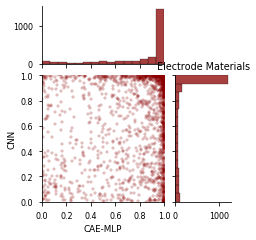

Sample type= thermoelectric -> agreement = 79.0%
Plot saved at: plots/sup/classifiers_comparison_on_thermoelectric.pdf


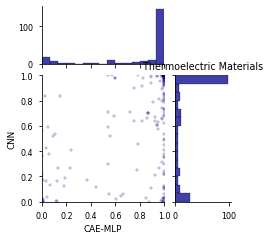

In [111]:
# db = 'cod'
tp = 'thermoelectric'
colors = ['darkred', 'darkblue']
for tp in ['electrode', 'thermoelectric']:
    df = df_all[
    #     (df_all['db']==db) & 
        (df_all['type']==tp)
    ]
    g = sns.jointplot(data=df, x="CAE-MLP", y="CNN",
                  xlim=(0, 1), ylim=(0, 1), height=88 / 100 * 3.93701,
                  ratio=2, marginal_ticks=True,
#                   palette=sns.palplot(sns.color_palette("RdBu", 10)),
#                   color=Plots.colors_databases[db],
                  color=colors.pop(0),
                  marginal_kws=dict(bins=15, fill=True),
#                   kind='hex', joint_kws=dict(gridsize=5),
                  marker='+', s=10,
                 )
#     g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
    plt.title(tp.title() + ' Materials')
    clf_comp = np.count_nonzero(df['CAE-MLP_label'] * df['CNN_label'] > 0) / len(df) * 100
    print(f'Sample type= {tp} -> agreement = {clf_comp:.1f}%')
    if save_plot:
        Plots.plot_save(f'classifiers_comparison_on_{tp}', path='plots/sup/', formats='pdf')
    plt.show()

# Electrode Materials 

In [10]:
electrode_df = pd.read_csv(data_path + '/electrode_materials/electrode-materials.csv')
np.random.seed(0)

cnn_dir = config.cnn_model_dir
yp_cs_cnn = pd.read_csv(cnn_dir + '/yp_cs.csv').rename(columns={
    'y': 'y_true', 'yp': 'yp_proba', 'ypl': 'yp_label', 'file': 'path'})
yp_cs_cnn
# electrode_df
# electrode_df['icsd-tag'] = electrode_df['db']
# electrode_df.loc[electrode_df['icsd_ids'].notna(), 'icsd-tag'] = 'ICSD'
# electrode_df.loc[(~electrode_df['icsd_ids'].notna()) & (electrode_df['db']=='mp'), 'icsd-tag'] = 'Non-ICSD'
# electrode_df = electrode_df[electrode_df['icsd-tag'].str.contains('ICSD')]

electrode_df = electrode_df[electrode_df['db'] == 'mp']
sg = utility_crystal.SpaceGroups()
electrode_df['HM'] = [sg.convert(i, 'Hall', 'HM') for i in electrode_df['hall']]
electrode_df['sgn'] = [sg.convert(i, 'Hall', 'sgn') for i in electrode_df['hall']]
electrode_df = electrode_df[electrode_df['working_ion'].isin(['Al', 'Cs'])]
electrode_df['x'] = None
electrode_df.loc[electrode_df['working_ion']=='Al', 'x'] = \
    np.random.rand((np.count_nonzero(electrode_df['working_ion']=='Al'))) / 2
electrode_df.loc[electrode_df['working_ion']=='Cs', 'x'] = \
    np.random.rand((np.count_nonzero(electrode_df['working_ion']=='Cs'))) / 2 + 0.5

df = pd.merge(yp_cs_cnn, electrode_df[['path', 'id', 'working_ion', 'HM', 'x', 'formula_discharge', 'sgn',
                                      'capacity_vol', 'average_voltage']],
              on='path', how='inner')
# df['icsd-tag'].value_counts()
# electrode_df['formula_charge'].value_counts()
# electrode_df
df = df.sample(frac=0.5, random_state=0).dropna()
# electrode_df

Plot saved at: plots/sup/working_ion_vs_synthesis.pdf


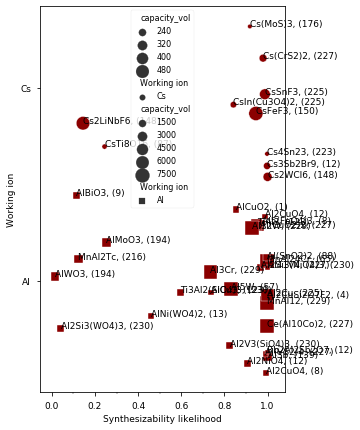

In [12]:
f, axs, font_size = Plots.plot_format(180, nrows=1, flip_size=True)

bat_dic = {
    'capacity_vol': 'Tot. Vol. Cap. ($AhI^{-1}$)',
    'average_voltage': 'Avg. Voltage ($V$)',
}
df['Working ion'] = df['working_ion']
# df[bat_dic['capacity_col']] = df['capacity_vol']


ax = axs
sns.scatterplot(data=df[df['working_ion'] == 'Cs'], 
                sizes=(20, 200), markers='o',
                x='yp_proba', y='x', style='Working ion',size='capacity_vol' ,ax=ax, color='darkred')
sns.scatterplot(data=df[df['working_ion'] == 'Al'], 
                sizes=(20, 200), markers=',',
                x='yp_proba', y='x', style='Working ion',size='capacity_vol' ,ax=ax, color='darkred')

ax.set_ylabel('Working ion')
ax.set_xlabel('Synthesizability likelihood')
Plots.ax_tick_locator(ax, major_period=.2, minor_period=.1)

ax.set_yticks([0.25, 0.75])
ax.set_yticklabels(['Al', 'Cs'])

for _, row in df.iterrows():
    ax.text(row['yp_proba'], row['x'], row['formula_discharge'] + f', ({row["sgn"]:.0f})')

# h, l = ax.get_legend_handles_labels()
# ax.get_legend().remove()
# axs[1].legend(h, l, loc='best', ncol=4)
# axs[1].axis('off')

# if save_plot:
#     Plots.plot_save(f'working_ion_vs_synthesis', path='plots/sup/', formats='pdf')

# Spacegroup distributions

## Negative samples
Considering all the negative samples in the data set 7 (top 108)

In [174]:
df_neg = pd.read_csv(f'{local_data_path}/data_bases/cspd/cif_top_108/df.csv')
# df_neg[['HM']]
# df = df_neg[['HM']]
# data = df_neg.groupby("HM")
# plt.pie(df['HM'])

sg, co = np.unique(df_neg['HM'], return_counts=True)
ind = np.flip(np.argsort(co))
co = co[ind]
sg = sg[ind]

df_neg['class'] = df_neg['class'].str.capitalize()
sg_class, co_class = np.unique(df_neg['class'], return_counts=True)
ind = np.flip(np.argsort(co_class))
co_class = co_class[ind]
sg_class = sg_class[ind]

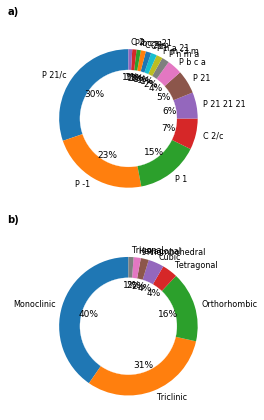

In [199]:
f, axs, font_size = Plots.plot_format(89, equal_axis=True, nrows=2)

ax = axs[0]

top_n = 15

my_circle = plt.Circle((0, 0), 0.7, color='white')
ax.pie(co[:top_n], labels=sg[:top_n], autopct='%.0f%%', startangle=90)
# ax.pie(np.append(co[:top_n], co[top_n:].sum(), axis=None),
#        labels=np.append(sg[:top_n], 'Other', axis=None), 
#        autopct='%.0f%%', startangle=90)
ax.add_artist(my_circle)

ax = axs[1]
my_circle = plt.Circle((0, 0), 0.7, color='white')
ax.pie(co_class, labels=sg_class, autopct='%.0f%%', startangle=90)
ax.add_artist(my_circle)

Plots.annotate_subplots_with_abc(axs)

# if save_plot:
#     Plots.plot_save(f'spacegroup_negative_pie_chart', path='plots/sup/', formats='pdf')

## Positive samples
Considering all the positive samples in the data set 7

In [98]:
pos_df = pd.read_csv(f'{local_data_path}/data_banks/cod/df.csv', index_col=0)
pos_df['cif_file'] = [local_data_path + '/data_banks/cod' + i for i in pos_df['filename']]

data_set_path = data_path + f'/data_sets/data_set_9/'

df = pd.concat([
    pd.read_csv(data_set_path + 'train.csv', index_col=0), 
    pd.read_csv(data_set_path + 'test.csv', index_col=0),
    pd.read_csv(data_set_path + 'dev.csv', index_col=0),
])
df = df[df['db']=='cod']

df = pd.merge(df[['cif_file']], 
             pos_df[['id', 'spacegroup', 'formula', 'db', 'cif_file', 'sgn']], 
             on='cif_file', how='inner')

sg = utility_crystal.SpaceGroups()
sg.convert(3, 'sgn', 'class')
df['class'] = [sg.convert(i, 'sgn', 'class') for i in df['sgn']]
df['class'] = df['class'].str.capitalize()

sg, co = np.unique(df['spacegroup'], return_counts=True)
ind = np.flip(np.argsort(co))
co = co[ind]
sg = sg[ind]

sg_class, co_class = np.unique(df['class'], return_counts=True)
ind = np.flip(np.argsort(co_class))
co_class = co_class[ind]
sg_class = sg_class[ind]

Plot saved at: plots/sup/spacegroup_positive_pie_chart.pdf


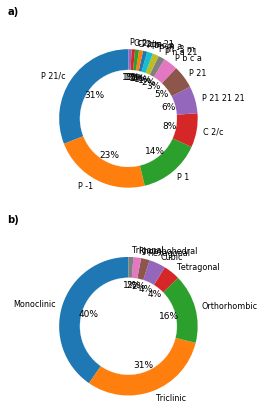

In [100]:
f, axs, font_size = Plots.plot_format(89, equal_axis=True, nrows=2)

ax = axs[0]

top_n = 15
my_circle = plt.Circle((0, 0), 0.7, color='white')
ax.pie(co[:top_n], labels=sg[:top_n], autopct='%.0f%%', startangle=90)
# ax.pie(np.append(co[:top_n], co[top_n:].sum(), axis=None),
#        labels=np.append(sg[:top_n], 'Other', axis=None), 
#        autopct='%.0f%%', startangle=90)
ax.add_artist(my_circle)

ax = axs[1]
my_circle = plt.Circle((0, 0), 0.7, color='white')
ax.pie(co_class, labels=sg_class, autopct='%.0f%%', startangle=90)
ax.add_artist(my_circle)

Plots.annotate_subplots_with_abc(axs)

# if s`ave_plot:
#     Plots.plot_save(f'spacegroup_positive_pie_chart', path='plots/sup/', formats='pdf')

# Exploring structures

In [97]:
selected_structures = load_var('finalized_results/explore_structures/selected_structures.pkl')
df = selected_structures['MoS2']
del df['atom']
df

,oid,sgn,formula,pretty_formula,yp,ypl,yp1,path
115,2310070,74,S8Mo4,MoS2,0.035104,-1.0,0.0,results/explore_structures/cif/MoS2/MoS2_74.cif
241,9009204,62,Mo4S8,MoS2,0.128917,-1.0,0.1,results/explore_structures/cif/MoS2/MoS2_62.cif
144,1536136,14,S4Mo4S4,MoS2,0.247065,-1.0,0.2,results/explore_structures/cif/MoS2/MoS2_14.cif
108,9000258,61,Mo8S16,MoS2,0.306568,-1.0,0.3,results/explore_structures/cif/MoS2/MoS2_61.cif
110,4343817,33,S4Mo4S4,MoS2,0.440914,-1.0,0.4,results/explore_structures/cif/MoS2/MoS2_33.cif
0,1010922,33,Mo8S16,MoS2,0.506467,1.0,0.5,results/explore_structures/cif/MoS2/MoS2_33.cif
34,1544731,136,Mo2S4,MoS2,0.624784,1.0,0.6,results/explore_structures/cif/MoS2/MoS2_136.cif
260,1539273,61,Mo4S8,MoS2,0.705346,1.0,0.7,results/explore_structures/cif/MoS2/MoS2_61.cif
82,1527864,194,S6Mo4S2,MoS2,0.817412,1.0,0.8,results/explore_structures/cif/MoS2/MoS2_194.cif
62,1514035,12,Mo6S12,MoS2,0.916283,1.0,0.9,results/explore_structures/cif/MoS2/MoS2_12.cif


Plot saved at: plots/sup/explore_structures_MoS2.pdf
Plot saved at: plots/sup/explore_structures_CSi.pdf
Plot saved at: plots/sup/explore_structures_GaN.pdf


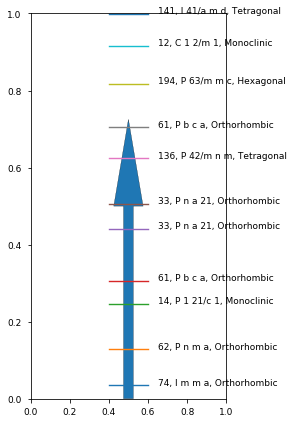

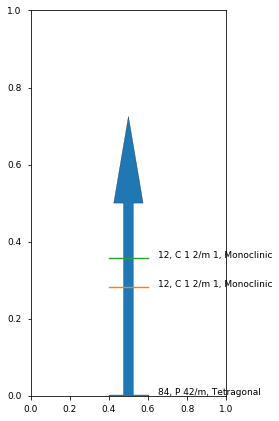

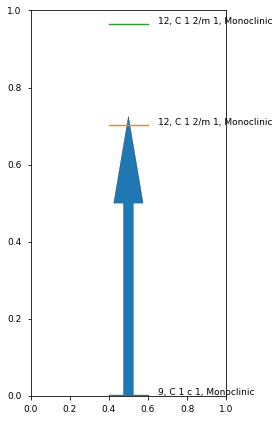

In [137]:
symbols_list = ['MoS2', 'CSi', 'GaN']
selected_structures = load_var('finalized_results/explore_structures/selected_structures.pkl')
selected_structures

symbols = symbols_list[0]
for symbols in symbols_list:
    f, axs, font_size = Plots.plot_format((89,180))
    ax = axs

    ax.arrow(0.5,0, 0, 0.5, width=.05)


    df = selected_structures[symbols]
    row = df.iloc[0, :]
    for _, row in df.iterrows():
        ax.plot([0.4, 0.6], [row['yp'], row['yp']])
        hm = utility_crystal.SpaceGroups().convert(row['sgn'], 'sgn', 'HM', pick_one=True)
        cl = utility_crystal.SpaceGroups().convert(row['sgn'], 'sgn', 'class', pick_one=True)
        axs.text(0.65, row['yp'], str(row['sgn']) + ', ' +  hm + ', ' + cl.capitalize())
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
#     if save_plot:
#         Plots.plot_save(f'explore_structures_{symbols}', path='plots/sup/', formats='pdf')

# 2D classification decision boundaries

In [225]:
n = 30 # number of points in the mesh side

pca_n_comp = 10
mlp_dir = f'important_results_NOGIT/pca_analysis_cae_mlp_d9_encoder_9/pca_n_comp/mlp_clf_pca{pca_n_comp}'
mlp_clf = load_var(mlp_dir + f'/classifier_class.pkl')

ss = mlp_clf.ss
pca = mlp_clf.pca
clf = mlp_clf.clf
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500, random_state=0)

picked_epoch = 4
X_all, y_all = load_var(config.cae_mlp_model_dir + f'/Xy_all_epoch{picked_epoch:04d}.pkl')
X_train, X_test, X_dev = X_all
y_train, y_test, y_dev = y_all

X_train = ss.transform(X_train)
X_train = pca.transform(X_train)
X_dev = ss.transform(X_dev)
X_dev = pca.transform(X_dev)



## Without retraining

Plot saved at: plots/review/decision_boundries.pdf


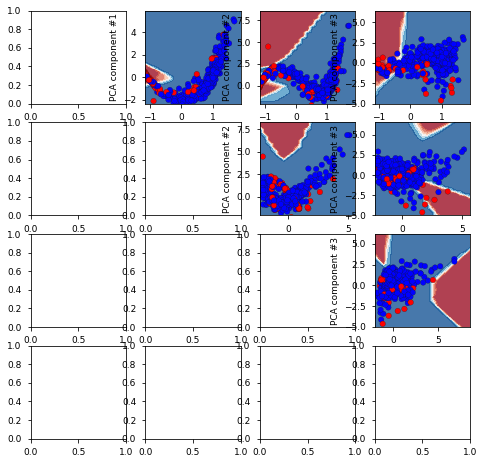

In [231]:
from matplotlib.colors import ListedColormap
cm = plt.cm.RdBu
# cm = plt.cm.YlOrRd
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

nrows = 4
ncols = nrows

f, axs, font_size = Plots.plot_format(200, equal_axis=True, nrows=nrows, ncols=ncols)
# ax = plt.subplot(1, 1, 1)

for f1 in range(nrows):
    for f2 in range(ncols):
        ax = axs[f1,f2]
#         ax.set_xticks(())
#         ax.set_yticks(())
        if f1 >= f2: 
            continue     

        x_min, x_max = X[:, f1].min() , X[:, f1].max()
        y_min, y_max = X[:, f2].min() , X[:, f2].max()
        h = (x_max - x_min) / 20
        i = 0.1
        xx, yy = np.meshgrid(np.arange(x_min * (1 - i), x_max * (1 + i), h),
                             np.arange(y_min * (1 - i), y_max * (1 + i), h))
        m = np.c_[xx.ravel(), yy.ravel()]
        
        avg_values = np.zeros((m.shape[0], 10)) + np.mean(X_train, axis=0)
        avg_values[:, f1] = m[:,0]
        avg_values[:, f2] = m[:,1]
        X_mesh = avg_values

        Z = clf.predict_proba(X_mesh)[:, 1]

        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        ind = pd.DataFrame({'i': range(len(X_dev))}).sample(frac=1, random_state=0)['i'].to_numpy()
        ax.scatter(X_dev[ind, f1], X_dev[ind, f2], c=y_dev[ind], cmap=cm_bright,
                   edgecolors='k', alpha=1)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel(f'PCA component #{f1 + 1}')
        ax.set_ylabel(f'PCA component #{f2 + 1}')

if save_plot:
    Plots.plot_save(f'decision_boundries', path='plots/review/', formats='pdf', transparent=True)

## With re-training based on the picked PCA components

Plot saved at: plots/sup/decision_boundries.pdf


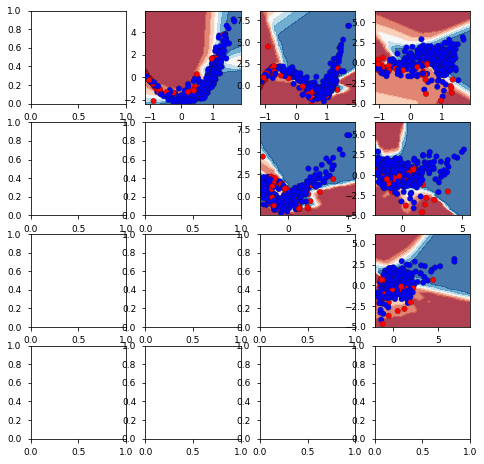

In [161]:
X = X_train
X_all = np.concatenate((X_train, X_dev))

from matplotlib.colors import ListedColormap
cm = plt.cm.RdBu
# cm = plt.cm.YlOrRd
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

nrows = 4
ncols = nrows

f, axs, font_size = Plots.plot_format(200, equal_axis=True, nrows=nrows, ncols=ncols)
# ax = plt.subplot(1, 1, 1)

for f1 in range(nrows):
    for f2 in range(ncols):
        ax = axs[f1,f2]
#         ax.set_xticks(())
#         ax.set_yticks(())
        if f1 >= f2: 
            continue        
            
        mlp = MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500, random_state=0)
        mlp.fit(X_train[:,[f1, f2]], y_train)
        score = mlp.score(X_dev[:,[f1, f2]], y_dev)
        
        x_min, x_max = X[:, f1].min() , X[:, f1].max()
        y_min, y_max = X[:, f2].min() , X[:, f2].max()
        h = (x_max - x_min) / 20
        i = 0.1
        xx, yy = np.meshgrid(np.arange(x_min * (1 - i), x_max * (1 + i), h),
                             np.arange(y_min * (1 - i), y_max * (1 + i), h))
        m = np.c_[xx.ravel(), yy.ravel()]
        # X_mesh = np.concatenate((m, np.zeros((m.shape[0], 10 - m.shape[1]))+2), axis=1)
        X_mesh = m

        Z = mlp.predict_proba(X_mesh)[:, 1]

        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        ind = pd.DataFrame({'i': range(len(X_dev))}).sample(frac=1, random_state=0)['i'].to_numpy()
        ax.scatter(X_dev[ind, f1], X_dev[ind, f2], c=y_dev[ind], cmap=cm_bright,
                   edgecolors='k', alpha=1)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        
#         ax.set_xlabel(f'PCA component #{f1}')
#         ax.set_ylabel(f'PCA component #{f2}')

#         Plots.put_costume_text_instead_of_legends(ax=ax, labels=[f'Acc.={score:.2f}'])
# if save_plot:
#     Plots.plot_save(f'decision_boundries', path='plots/sup/', formats='pdf')

# Table: Selected electrode predictions

In [53]:
electrode_df = pd.read_csv(data_path + '/electrode_materials/electrode-materials.csv')

cnn_dir = config.cnn_model_dir
mlp_dir = config.cae_mlp_model_dir

yp_cs_cnn = pd.read_csv(cnn_dir + '/yp_cs.csv').rename(columns={
    'y': 'y_true', 'yp': 'CNN', 'ypl': 'yp_label'})
yp_cs_mlp = pd.read_csv(mlp_dir + '/cs_predictions.csv').rename(columns={
    'yp_mlp': 'CAE+MLP-C', 'y': 'y_true', 'ypl_mlp': 'yp_label'})

assert (yp_cs_cnn['file'] == yp_cs_mlp['file']).all()
assert (yp_cs_mlp.loc[yp_cs_mlp['type'] == 'electrode']['file'] == electrode_df['path']).all()

electrode_df = pd.read_csv(data_path + '/electrode_materials/electrode-materials.csv')

electrode_df = electrode_df[electrode_df['db'] == 'mp']
sg = utility_crystal.SpaceGroups()
electrode_df['HM'] = [sg.convert(i, 'sgn', 'HM', pick_one=True) for i in electrode_df['sgn']]
yp_cs_cnn['path'] = yp_cs_cnn['file']

df = pd.concat([yp_cs_cnn[['path', 'CNN']], yp_cs_mlp[['CAE+MLP-C']]], axis=1)
df = pd.merge(electrode_df, df, on='path', how='inner')
# df

In [54]:
df_sampled = df.sample(n=20, random_state=0)[['formula_discharge', 'HM', 'id', 'CNN', 'CAE+MLP-C']]
df_sampled = df_sampled.round(2)
# df_sampled['formula_discharge'] = '\\ch{' + df_sampled['formula_discharge'] + '}'
df_sampled.columns = ['Material', 'Spacegroup', 'Material ID', 'CNN', 'CAE+MLP']

lat = df_sampled.to_latex(index=False)
l = lat.split('\n')[:4]
for i in lat.split('\n')[4:-3]:
    l.append('\\ch{' + i.split('&')[0] + '} &' + '&'.join(i.split('&')[1:]))
l += lat.split('\n')[-3:]
lat = '\n'.join(l)
print(lat)

\begin{tabular}{lllrr}
\toprule
      Material &  Spacegroup &    Material ID &   CNN &  CAE+MLP \\
\midrule
\ch{ Li7La3(SnO6)2 } &        I -4 &  mp-1200057\_Li &  0.15 &     0.95 \\
\ch{     Li3(WO3)8 } &      I m -3 &  mp-1222771\_Li &  0.39 &     0.93 \\
\ch{ Li4Mn2P4H3O16 } &         P 1 &   mp-763324\_Li &  1.00 &     0.99 \\
\ch{   Li2Ni(PO3)5 } &     P 1 c 1 &   mp-540011\_Li &  1.00 &     1.00 \\
\ch{        MgV2O4 } &  P 1 21/m 1 &   mvc-11573\_Mg &  0.22 &     0.98 \\
\ch{ Li2CuSb(PO4)2 } &  P 1 21/m 1 &   mp-755148\_Li &  1.00 &     0.88 \\
\ch{       Li2MgBi } &    F -4 3 m &  mp-1222662\_Li &  1.00 &     1.00 \\
\ch{        MgV2O5 } &     C m c m &    mp-19003\_Mg &  0.96 &     0.82 \\
\ch{    LiV(SiO3)2 } &         P 1 &    mp-19043\_Li &  0.92 &     0.63 \\
\ch{   Li3Fe(PO4)2 } &        P -1 &   mp-762711\_Li &  1.00 &     0.98 \\
\ch{  Li6Mn3P6WO24 } &         R 3 &  mp-1176455\_Li &  1.00 &     1.00 \\
\ch{     Mg(CuO2)2 } &    F d -3 m &    mvc-4609\_Mg &  0.97 &    

# Table: Thermoelectric Materials

In [135]:
yp_cs_cnn = pd.read_csv(cnn_dir + '/yp_cs.csv').rename(columns={
    'y': 'y_true', 'yp': 'yp_proba', 'ypl': 'yp_label'})
yp_cs_mlp = pd.read_csv(mlp_dir + '/cs_predictions.csv').rename(columns={
    'yp_mlp': 'yp_proba', 'y': 'y_true', 'ypl_mlp': 'yp_label'})
yp_cs_cnn['CNN'] = yp_cs_cnn['yp_proba']
yp_cs_mlp['CAE-MLP'] = yp_cs_mlp['yp_proba']
yp_cs = pd.concat([yp_cs_cnn[['file', 'CNN']], yp_cs_mlp[['CAE-MLP']]], axis=1)

df = yp_cs_mlp[yp_cs_mlp['type'] == 'thermoelectric']

# To make sure we remove the MP samples that exist in the COD
thermo_df = pd.read_csv(f'{data_path}/thermoelectric_materials/thermoelectric_materials.csv')
thermo_df['filename'] = thermo_df['filename'].str.replace('/ali/', '/adavar2/')
thermo_df['file'] = thermo_df['filename']
assert (df.reset_index()['file'] == thermo_df.reset_index()['filename']).all()
assert (yp_cs_cnn['file'] == yp_cs_mlp['file']).all()

df = thermo_df
df = df[(df['db'] == 'mp') | (df['db'] == 'cod')]
df = df.dropna()
df = pd.merge(df.drop(columns=['filename']), yp_cs, on='file', how='left')
sg = utility_crystal.SpaceGroups()
df['HM'] = [sg.convert(int(i), 'sgn', 'HM', pick_one=True) for i in df['sgn']]

df['sgn'] = df['sgn'].astype('int')
df['CNN'] = df['CNN'].round(2)
df['CAE-MLP'] = df['CAE-MLP'].round(2)

df['id'] = [i.split('/')[-1].split('.')[0] for i in df['file']]
df['id'] = [(i if 'm' in i else 'cod-' + i) for i in df['id']]

df = df.drop_duplicates(['id', 'year', 'db', 'formula_hill', 'HM'])

df_all = df
df_all

,year,formula,db,sgn,HM,formula_hill,file,CNN,CAE-MLP,id
0,2001,EuH3Li,mp,221,P m -3 m,H3EuLi,/home/adavar2/Data/cod/thermoelectric/cif-top-10s/mp-541365.cif,0.25,1.00,mp-541365
1,2001,CdGeP2,mp,225,F m -3 m,CdGeP2,/home/adavar2/Data/cod/thermoelectric/cif-top-10s/mp-16268.cif,0.95,0.96,mp-16268
2,2001,CdGeP2,mp,160,R 3 m,CdGeP2,/home/adavar2/Data/cod/thermoelectric/cif-top-10s/mp-1226745.cif,1.00,1.00,mp-1226745
3,2001,CdGeP2,cod,122,I -4 2 d,CdGeP2,/home/adavar2/Data/cod/thermoelectric/cif-top-10s/8103559.cif,1.00,1.00,cod-8103559
4,2001,B2V,cod,191,P 6/m m m,B2V,/home/adavar2/Data/cod/thermoelectric/cif-top-10s/2107290.cif,0.27,0.13,cod-2107290
...,...,...,...,...,...,...,...,...,...,...
108,2017,Ag3AuSe2,cod,214,I 41 3 2,Ag3AuSe2,/home/adavar2/Data/cod/thermoelectric/cif-top-10s/1509884.cif,0.10,1.00,cod-1509884
109,2018,P2SnZn,mp,122,I -4 2 d,P2SnZn,/home/adavar2/Data/cod/thermoelectric/cif-top-10s/mp-4175.cif,1.00,1.00,mp-4175
110,2018,P2SnZn,mp,115,P -4 m 2,P2SnZn,/home/adavar2/Data/cod/thermoelectric/cif-top-10s/mp-1215429.cif,0.94,1.00,mp-1215429
111,2018,CuTe,cod,59,P m m n,CuTe,/home/adavar2/Data/cod/thermoelectric/cif-top-10s/1526237.cif,0.83,1.00,cod-1526237


In [131]:
for y in np.arange(2002,2018+1):
    print('-' * 20)
    print('Year = ', y, '\n')
    df = df_all[df_all['year'] == y] 
    df = df[['formula', 'HM', 'id', 'CNN', 'CAE-MLP']]
    df.columns = ['Material', 'Spacegroup', 'Material ID', 'CNN', 'CAE-MLP']
    
    lat = df.to_latex(index=False)
    l = lat.split('\n')[:4]
    for i in lat.split('\n')[4:-3]:
        l.append('\\ch{' + i.split('&')[0] + '} &' + '&'.join(i.split('&')[1:]))
    l += lat.split('\n')[-3:]
    lat = '\n'.join(l)
    print(lat)
    

--------------------
Year =  2002 

\begin{tabular}{lllrr}
\toprule
Material & Spacegroup &  Material ID &   CNN &  CAE-MLP \\
\midrule
\ch{  Mo3Te4 } &       R -3 &      mp-8601 &  0.38 &     1.00 \\
\ch{    B2Zr } &  P 6/m m m &  cod-1510856 &  0.38 &     0.06 \\
\ch{   Si2Zr } &    C m c m &  cod-1010265 &  0.27 &     0.95 \\
\ch{  Mo5Si3 } &  I 4/m c m &  cod-1537674 &  0.13 &     0.07 \\
\ch{    SbTm } &   P m -3 m &   mp-1002220 &  0.86 &     1.00 \\
\ch{    SbTm } &   F m -3 m &  cod-9008752 &  0.81 &     1.00 \\
\bottomrule
\end{tabular}

--------------------
Year =  2003 

\begin{tabular}{lllrr}
\toprule
Material & Spacegroup &  Material ID &   CNN &  CAE-MLP \\
\midrule
\ch{    B6Eu } &   P m -3 m &  cod-1008905 &  0.94 &     0.89 \\
\ch{  As3Yb4 } &   I -4 3 d &      mp-1098 &  0.21 &     0.93 \\
\ch{  As3Yb4 } &      R 3 c &  cod-1532359 &  0.03 &     0.99 \\
\ch{   ReSe2 } &   P -6 m 2 &   mp-1102379 &  0.03 &     0.99 \\
\ch{   ReSe2 } &       P -1 &  cod-1539953 &  0.06 

# Atomic distributions in the images

In [ ]:
# data_set_path = data_path + f'/data_sets/data_set_9/'
# train_generator_9 = image_generator.ImageGeneratorDataFrame(data_set_path + 'train.csv', over_sample=True)
# test_generator_9 = image_generator.ImageGeneratorDataFrame(data_set_path + 'test.csv')
# dev_generator_9 = image_generator.ImageGeneratorDataFrame(data_set_path + 'dev.csv')
# df_cs = pd.read_csv(data_path + '/data_sets/electrode_thermoelectric_materials.csv')
# cs_generator = image_generator.ImageGeneratorDataFrame(df_cs)

# frq_count_train_9 = np.zeros(118)
# for i, row in tqdm.tqdm_notebook(train_generator_9.df.iterrows()):
#     img = np.load(row['img_path'])
#     at_n, at_r = np.unique(img[0,:,:,:,0], return_counts=True)
#     at_n = at_n[1:]
#     at_r = at_r[1:]
#     frq_count_train_9[at_n-1] += at_r 
    
# frq_count_test_9 = np.zeros(118)
# for i, row in tqdm.tqdm_notebook(test_generator_9.df.iterrows()):
#     img = np.load(row['img_path'])
#     at_n, at_r = np.unique(img[0,:,:,:,0], return_counts=True)
#     at_n = at_n[1:]
#     at_r = at_r[1:]
#     frq_count_test_9[at_n-1] += at_r 
    
# frq_count_thermoelectric = np.zeros(118)
# for i, row in tqdm.tqdm_notebook(cs_generator.df[cs_generator.df['type'] == 'thermoelectric'].iterrows()):
#     img = np.load(row['img_path'])
#     at_n, at_r = np.unique(img[0,:,:,:,0], return_counts=True)
#     at_n = at_n[1:]
#     at_r = at_r[1:]
#     frq_count_thermoelectric[at_n-1] += at_r 

# frq_count_electrode = np.zeros(118)
# for i, row in tqdm.tqdm_notebook(cs_generator.df[cs_generator.df['type'] == 'electrode'].iterrows()):
#     img = np.load(row['img_path'])
#     at_n, at_r = np.unique(img[0,:,:,:,0], return_counts=True)
#     at_n = at_n[1:]
#     at_r = at_r[1:]
#     frq_count_electrode[at_n-1] += at_r 


In [ ]:
# df = pd.DataFrame({
#     'atomic number': np.arange(118) + 1,
#     'train counts': np.array(frq_count_train_9, dtype=int),
#     'test counts': np.array(frq_count_test_9, dtype=int),
#     'electrode counts': np.array(frq_count_electrode, dtype=int),
#     'thermoelectric counts': np.array(frq_count_thermoelectric, dtype=int),
# })
# df.to_csv('data_sets/data_set_9/atomic_distribution.csv', index=False)

Plot saved at: plots/sup/image_atomic_distributions.pdf


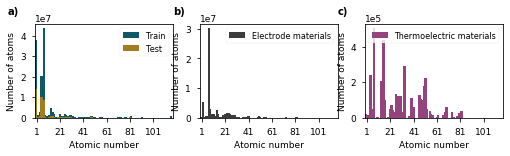

In [84]:
df = pd.read_csv('data_sets/data_set_9/atomic_distribution.csv')

pal = sns.color_palette('dark')

f, axs, font_size = Plots.plot_format(213, equal_axis=False, nrows=1, ncols=3)
axiter = iter(axs)
ax = next(axiter)

sns.barplot(x='atomic number', y='train counts', data=df, ax=ax, 
#             color='darkblue', 
            color=pal.pop(),
            label='Train')
sns.barplot(x='atomic number', y='test counts', data=df, ax=ax, 
#             color='darkred', 
            color=pal.pop(),
            label='Test')

ax = next(axiter)
sns.barplot(x='atomic number', y='electrode counts', data=df, ax=ax, 
#             color='darkgreen', 
            color=pal.pop(),
            label='Electrode materials')


ax = next(axiter)
sns.barplot(x='atomic number', y='thermoelectric counts', data=df, ax=ax, 
#             color='darkgreen', 
            color=pal.pop(),
            label='Thermoelectric materials')



for ax in axs:
    ax.legend()
    ax.set_xticks(np.arange(1, 117, 20))
    ax.set_xticklabels(np.arange(1, 117, 20))
    ax.set_ylabel('Number of atoms')
    ax.set_xlabel('Atomic number')
    Plots.change_bar_width(ax, 2)
    Plots.plot_tick_formatter(ax)
#     ax.set_yscale('log')
Plots.annotate_subplots_with_abc(axs)

if save_plot:
    Plots.plot_save(f'image_atomic_distributions', path='plots/sup/', formats='pdf', transparent=True)

# Base model

## Loss vs. Epoch

Plot saved at: plots/sup/base_model_loss_vs_epoch.pdf


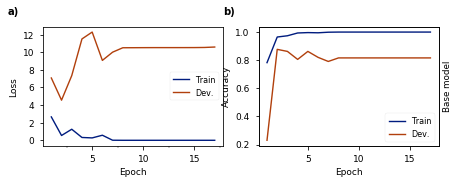

In [117]:
base_model_dir = 'finalized_results/root_classifier/train_root_classifier_d9'

df = pd.read_csv(base_model_dir + '/history.csv')
df['epoch'] = np.arange(len(df)) + 1
hist = df

f, axs, font_size = Plots.plot_format(180, ncols=2, nrows=1)

sns.set_palette("dark")
ax_iter = iter(axs[:])


# ###################### A)
ax = next(ax_iter)
sns.lineplot(hist['epoch'], hist["loss"], ax=ax)
sns.lineplot(hist['epoch'], hist["val_loss"], ax=ax)
ax.legend(["Train", "Dev."])
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
Plots.ax_tick_locator(ax, axis='x', major_period=5, minor_period=2.5)


# ###################### B)
ax = next(ax_iter)
sns.lineplot(hist['epoch'], hist["accuracy"], ax=ax)
sns.lineplot(hist['epoch'], hist["val_accuracy"], ax=ax)
ax.legend(["Train", "Dev."])
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
# Plots.ax_tick_locator(ax, axis='x', major_period=5, minor_period=2.5)
# Plots.ax_tick_locator(ax, axis='y', major_period=.05, minor_period=.025)
# ax.set_ylim(.85, 1)
Plots.ylabel_right_side(ax, 'Base model')

Plots.annotate_subplots_with_abc(axs)
# if save_plot:
#     Plots.plot_save(f'base_model_loss_vs_epoch', path='plots/sup/', formats='pdf')
plt.show()

## ROC

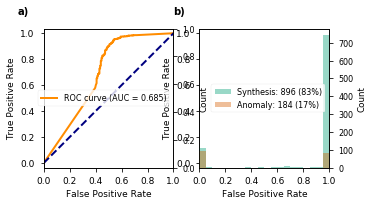

In [162]:
base_model_dir = 'finalized_results/root_classifier/train_root_classifier_d9'


yp_test_base = pd.read_csv(base_model_dir + '/yp_test.csv').rename(columns={
    'y': 'y_true', 'yp': 'yp_proba', 'ypl': 'yp_label'})

f, axs, font_size = Plots.plot_format(130, ncols=2, nrows=1, equal_axis=True)
ax = axs[0]
ml_tools.plot_roc_curve(y=yp_test_base['y_true'], yp=yp_test_base['yp_proba'], plot_dist=False, ax=ax)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)


ax = axs[1]
ml_tools.plot_roc_curve(y=yp_test_base['y_true'], yp=yp_test_base['yp_proba'], plot_roc=False, ax=ax)
ax.set_xlim(0, 1)
Plots.annotate_subplots_with_abc(axs)
# if save_plot:
#     Plots.plot_save(f'base_model_roc', path='plots/sup/', formats='pdf')

In [164]:
accuracy_score(yp_test_base['y_true'], yp_test_base['yp_label'])

0.8046296296296296

# V2O5

In [126]:
df

,energy_per_atom,e_above_hull,material_id,full_formula,sgn,hall,crystal_system,symbol,experiment,yp cae-mlp,ypl cae-mlp,yp cnn,ypl cnn
29,-7.402661,0.039592,mp-1104615,V4O10,2,-P 1,triclinic,P-1,True,0.999997,1.0,0.999844,1.0
51,-7.429311,0.012942,mp-25288,V8O20,62,-P 2ac 2n,orthorhombic,Pnma,True,0.998370,1.0,0.998334,1.0
14,-7.309034,0.133219,mp-624689,V4O10,59,P 2 2ab -1ab,orthorhombic,Pmmn,True,0.999700,1.0,0.978988,1.0
46,-7.381619,0.060634,mp-542844,V4O10,15,-C 2yc,monoclinic,C2/c,True,0.408365,-1.0,0.314881,-1.0
47,-7.314709,0.127544,mp-1178826,V2O5,12,-C 2y,monoclinic,C2/m,True,0.998105,1.0,0.778465,1.0
56,-7.412333,0.029920,mp-510568,V4O10,11,-P 2yb,monoclinic,P2_1/m,True,0.524704,1.0,0.947620,1.0
52,-7.374704,0.067549,mp-1245120,V30O75,1,P 1,triclinic,P1,False,0.999988,1.0,0.999726,1.0
32,-7.408078,0.034174,mp-776041,V8O20,14,-P 2ybc,monoclinic,P2_1/c,False,0.999985,1.0,0.999232,1.0
39,-7.430910,0.011343,mp-25233,V4O10,63,-C 2c 2,orthorhombic,Cmcm,False,0.999914,1.0,0.998887,1.0
7,-6.802322,0.639930,mp-1216596,V2O5,71,-I 2 2,orthorhombic,Immm,False,0.999958,1.0,0.999992,1.0


Text(0, 0.5, 'Energy above hull')

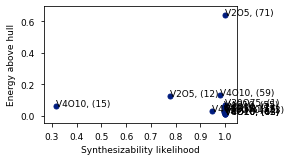

In [127]:
df = pd.read_pickle('tmp/V2O5.pkl')
del df['query']
del df['atoms']

df = df.drop_duplicates(['symbol', 'full_formula'])

f, axs, font_size = Plots.plot_format(88, ncols=1, nrows=1, equal_axis=False)
ax = axs

ax.scatter(df['yp cnn'],
           df['e_above_hull'], s=25, linewidth=1.)

for _, row in df.iterrows():
    ax.text(row['yp cnn'], row['e_above_hull'], row['full_formula'] + f', ({row["sgn"]:.0f})')

ax.set_xlabel('Synthesizability likelihood')
ax.set_ylabel('Energy above hull')

In [129]:
df = pd.read_pickle('tmp/V2O5.pkl')
del df['query']
del df['atoms']
df.to_csv('tmp/V2O5.csv')